In [ ]:
import pandas as pd
from os.path import join
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('./emotion_validation_mode.csv')

In [5]:
df.head(5)

,id,Text,anger_manual,disgust_manual,enthusiasm_manual,fear_manual,hope_manual,joy_manual,pride_manual,sadness_manual,anger_inference,fear_inference,disgust_inference,sadness_inference,joy_inference,enthusiasm_inference,pride_inference,hope_inference
0,1306102257574981632,Eine wahrlich inspirierende Geschichte! Glüc...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.009630,0.008169,0.012276,0.013121,0.998035,0.024947,0.158885,0.021732
1,1309474783554342917,Dann seien Sie mutig und tun Sie was anstatt...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026305,0.008811,0.019384,0.009660,0.007751,0.992800,0.011003,0.070402
2,1311523333624803330,An dieser Stelle: HERZLICHEN GLÜCKWUNSCH zur ...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.007396,0.008599,0.011001,0.011946,0.997979,0.027778,0.095188,0.025678
3,1311638890516709376,"Heute, als ich die Verleihung sah, war ich au...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.007982,0.007712,0.013098,0.018224,0.998021,0.021970,0.105522,0.017236
4,1312775225663262720,Durchhalten! Die Demokratiebewegung kann zure...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.013726,0.010510,0.008618,0.010497,0.229563,0.015492,0.995200,0.013233


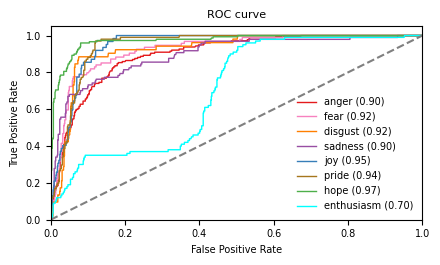

In [ ]:
emotions = ['anger', 'fear', 'disgust', 'sadness',
            'joy', 'pride', 'hope', 'enthusiasm']

emotions_cmap = {
    "anger": "#e41a1c",
    "fear": "#f781bf",
    "disgust": "#ff7f00",
    "sadness": "#984ea3",
    "joy": "#377eb8",
    "pride": "#a6761d",
    "hope": "#4daf4a",
    "enthusiasm": "cyan",
}
plt.figure(figsize=(4.5, 2.75))
for emotion in emotions:
    y_true = df[f"{emotion}_manual"]
    y_scores = df[f"{emotion}_inference"]
    
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, 
              color=emotions_cmap[emotion],
              lw=1, 
              label=f'{emotion} ({roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=7)
plt.ylabel('True Positive Rate', fontsize=7)
plt.title('ROC curve', fontsize=8)
plt.tick_params(axis='both', which='major', labelsize=7)
plt.legend(loc='lower right', frameon=False, fontsize=7)
plt.tight_layout()
plt.savefig('./roc_curve.pdf', dpi=300)
plt.show()